In [6]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1) Suno Research

In [7]:
ticker = 'petr4'
with open(f'../src/crawlers/suno/results/suno-{ticker}.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [8]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [9]:
df_suno.sample(5)

,topic,title,search_date,url,tags
date,,,,,
2021-07-23 14:19:00,Mercado,Ibovespa cai 1% e descola de alta do exterior ...,2022-05-03 16:09:06,https://www.suno.com.br/noticias/ibovespa-ipca...,"[Bolsa de Valores de São Paulo (B3), Especiali..."
2021-05-14 17:32:00,Negócios,"Ibovespa sobe 0,97% com exterior e balanços; I...",2022-05-03 16:12:10,https://www.suno.com.br/noticias/ibovespa-sobe...,"[Especialistas, Gerdau (GGBR3/GGBR4), Ibovespa..."
2020-10-02 08:12:00,Negócios,"Após decisão do STF, Petrobras (PETR4) dará co...",2022-05-03 16:20:44,https://www.suno.com.br/noticias/decisao-stf-p...,"[desinvestimentos, Petrobras (PETR4), Supremo ..."
2020-09-02 20:24:00,Negócios,Petrobras (PETR4) reduz preço do diesel e da g...,2022-05-03 16:22:32,https://www.suno.com.br/noticias/petrobras-pet...,"[combustíveis, diesel, PETR3, Petrobras (PETR4)]"
2021-10-19 13:45:00,Mercado,"Preço da gasolina chega a R$ 7,49 e gás de coz...",2022-05-03 16:06:21,https://www.suno.com.br/noticias/preco-gasolin...,"[gás, Gasolina, Petrobras (PETR4)]"


In [10]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2020-07-16 08:27:00 to 2022-05-02 11:36:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic        1190 non-null   object
 1   title        1190 non-null   object
 2   search_date  1190 non-null   object
 3   url          1190 non-null   object
 4   tags         1190 non-null   object
dtypes: object(5)
memory usage: 55.8+ KB


c:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


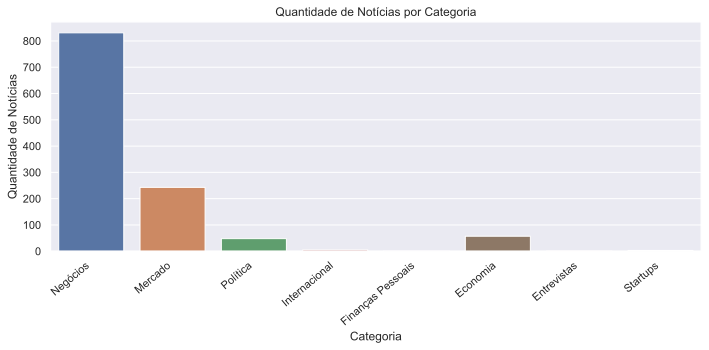

In [11]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

In [12]:
df_suno['topic'].value_counts()

Negócios             831
Mercado              243
Economia              57
Política              48
Internacional          5
Startups               3
Finanças Pessoais      2
Entrevistas            1
Name: topic, dtype: int64

In [13]:
print ('Suno Research')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_suno.loc[start_date:end_date].shape[0]))

Suno Research
Notícias em 2018: 0
Notícias em 2019: 0
Notícias em 2020: 283
Notícias em 2021: 712
Notícias em 2022: 195


In [14]:
print (f"Número Máximo de Notícias no Dia: {df_suno.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_suno.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_suno.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 16
Número Mínimo de Notícias no Dia: 0
Número Médio de Notícias no Dia: 1.8140243902439024


<AxesSubplot:xlabel='date'>

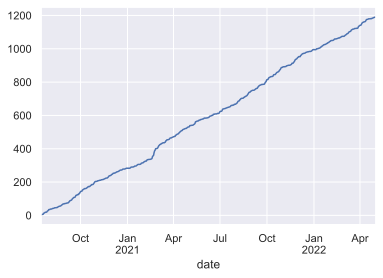

In [15]:
df_suno.resample('D').topic.count().cumsum().plot()

---

## 2. Infomoney

In [18]:
with open(f'../src/crawlers/infomoney/results/infomoney-results.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_infomoney= pd.DataFrame(data)

In [21]:
# Convert date to datetime format
df_infomoney['date'] = pd.to_datetime(df_infomoney['date'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_infomoney.set_index('date', inplace=True)

# Order by date
df_infomoney.sort_index(inplace=True)

In [23]:
df_infomoney.sample(5)

,topic,title,search_date,link,tags
date,,,,,
2021-09-16 10:00:42,stock-pickers,"Menos dívidas, mais dividendos e 17 milhões de...",2022-05-06 18:13:42,https://www.infomoney.com.br/stock-pickers/men...,"[Mercados, Stock Pickers, Alpargatas, Calçados..."
2021-08-02 07:45:32,mercados,Os 5 assuntos que vão movimentar o mercado nes...,2022-05-06 18:55:16,https://www.infomoney.com.br/mercados/os-5-ass...,"[Mercados, 5 Assuntos, Ações, Ajuste Fiscal]"
2021-06-24 06:48:42,mercados,Índices futuros americanos e bolsas europeias ...,2022-05-06 19:28:19,https://www.infomoney.com.br/mercados/indices-...,"[Mercados, Bolsas Asiáticas, Bolsas Europeias,..."
2021-05-12 18:31:02,mercados,"Suzano tem prejuízo de R$ 2,7 bi no 1º trimest...",2022-05-06 20:02:08,https://www.infomoney.com.br/mercados/suzano-t...,"[Mercados, Ações, Papel e Celulose, Suzano, Te..."
2022-04-28 16:40:00,economia,Setor de serviços abre 111.513 vagas e puxa da...,2022-05-06 14:50:45,https://www.infomoney.com.br/economia/setor-de...,"[Economia, Mercados, Caged, Emprego]"


c:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


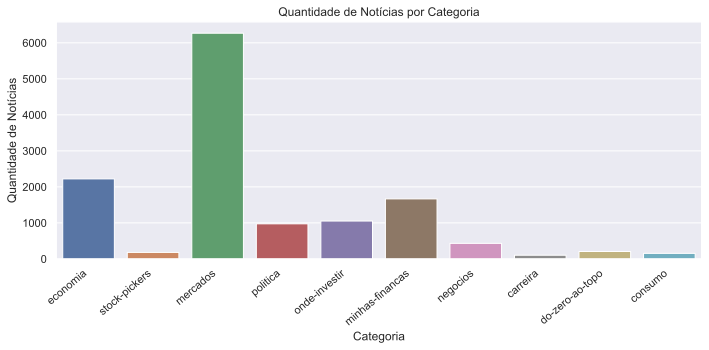

In [24]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_infomoney['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

In [25]:
print ('Infomoney')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_infomoney.loc[start_date:end_date].shape[0]))

Infomoney
Notícias em 2018: 0
Notícias em 2019: 0
Notícias em 2020: 0
Notícias em 2021: 8381
Notícias em 2022: 4875


In [26]:
print (f"Número Máximo de Notícias no Dia: {df_infomoney.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_infomoney.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_infomoney.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 88
Número Mínimo de Notícias no Dia: 1
Número Médio de Notícias no Dia: 36.417582417582416


<AxesSubplot:xlabel='date'>

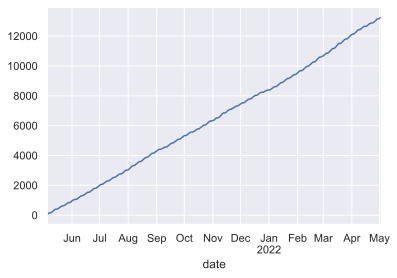

In [27]:
df_infomoney.resample('D').topic.count().cumsum().plot()

---

## 3. MoneyTimes

In [30]:
ticker = 'b3sa3'

with open(f'../src/crawlers/moneytimes/results/moneytimes-{ticker}.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_moneytimes = pd.DataFrame(data)

In [31]:
df_moneytimes.head()

,topic,title,date,search_date,link,tags
0,Empresas,"Ambipar (AMBP3) distribuirá R$ 34,2 milhões em...",04/05/2022 - 19:29,2022-05-06 00:28:47,https://www.moneytimes.com.br/ambipar-ambp3-di...,"[Ações, Ambipar, B3, Bradesco, Dividendos, Emp..."
1,Ações,"Frigoríficos resistiam ao Ibovepa, exceto BRF ...",02/05/2022 - 12:22,2022-05-06 00:28:55,https://www.moneytimes.com.br/frigorificos-res...,"[Agro Times, Agronegócio, B3, BRF, Carnes, Exp..."
2,Mercados,Ibovespa (IBOV): O que importa para a bolsa ho...,28/04/2022 - 10:12,2022-05-06 00:29:00,https://www.moneytimes.com.br/ibovespa-ibov-o-...,"[Ações, B3, Empresas, Inflação, Mercados, Reut..."
3,Câmbio,Dólar (USDBLR) inverte sinal e perde mais de 1...,04/05/2022 - 17:16,2022-05-06 00:29:00,https://www.moneytimes.com.br/dolar-usdblr-fec...,"[B3, Banco Central, Câmbio, Copom, Dólar, Empr..."
4,Mercados,Ibovespa: Veja o que importa para a bolsa hoje...,02/05/2022 - 10:09,2022-05-06 00:29:00,https://www.moneytimes.com.br/ibovespa-altas-e...,"[Ações, B3, Bolsa, Bolsa de Valores, China, Co..."


In [33]:
# Convert date to datetime format
df_moneytimes['date'] = pd.to_datetime(df_moneytimes['date'], format='%d/%m/%Y - %H:%M')

# Set date column as index
df_moneytimes.set_index('date', inplace=True)

# Order by date
df_moneytimes.sort_index(inplace=True)

In [34]:
df_moneytimes.sample(5)

,topic,title,search_date,link,tags
date,,,,,
2022-05-03 13:29:00,Empresas,Localiza (RENT3) espera melhora em recebimento...,2022-05-06 00:30:06,https://www.moneytimes.com.br/localiza-rent3-e...,"[B3, Empresas, Ibovespa, Localiza, Resultados,..."
2021-08-16 16:08:00,Colunistas,Alex Nascimento: o incontestável crescimento d...,2022-05-06 00:50:18,https://www.moneytimes.com.br/alex-nascimento-...,"[Alemanha, Alex Nascimento, B3, Bitcoin (BTC),..."
2021-10-27 20:17:00,Mercados,B3 recebe nova multa de R$ 204 mi da Receita F...,2022-05-06 00:43:57,https://www.moneytimes.com.br/b3-recebe-nova-m...,"[B3, Infraestrutura, Mercados, Receita Federal..."
2021-12-17 08:02:00,Perspectivas 2022,Os melhores investimentos em renda variável pa...,2022-05-06 00:40:57,https://www.moneytimes.com.br/os-melhores-inve...,"[Ações, B3, BDR's, Comprar ou vender?, Economi..."
2021-06-01 16:11:00,Comprar ou vender?,BR Distribuidora é escolhida para compor carte...,2022-05-06 00:56:20,https://www.moneytimes.com.br/br-distribuidora...,"[Ações, Ativa Investimentos, B3, BB Seguridade..."


c:\Users\mathe\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


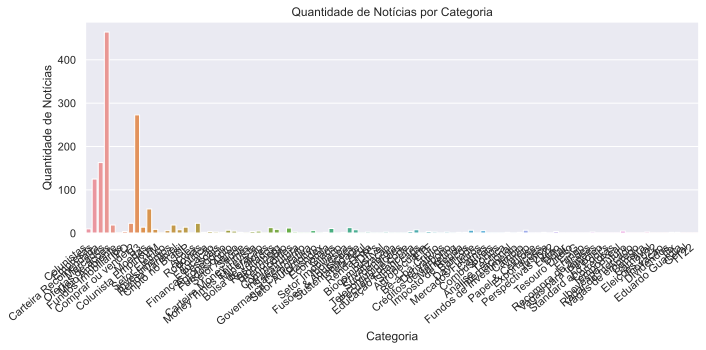

In [35]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_moneytimes['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Quantidade de Notícias por Categoria')
plt.ylabel('Quantidade de Notícias')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show();

In [36]:
print ('MoneyTimes')

# Number of news per year
for year in range (2018, 2023):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_moneytimes.loc[start_date:end_date].shape[0]))

MoneyTimes
Notícias em 2018: 0
Notícias em 2019: 0
Notícias em 2020: 0
Notícias em 2021: 989
Notícias em 2022: 476


In [37]:
print (f"Número Máximo de Notícias no Dia: {df_moneytimes.resample('D').topic.count().max()}")
print (f"Número Mínimo de Notícias no Dia: {df_moneytimes.resample('D').topic.count().min()}")
print (f"Número Médio de Notícias no Dia: {df_moneytimes.resample('D').topic.count().mean()}")

Número Máximo de Notícias no Dia: 12
Número Mínimo de Notícias no Dia: 0
Número Médio de Notícias no Dia: 3.21978021978022


<AxesSubplot:xlabel='date'>

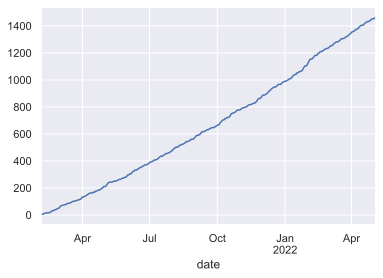

In [38]:
df_moneytimes.resample('D').topic.count().cumsum().plot()

---

## 4. Twitter

In [38]:
with open('../src/crawlers/twitter/results/infomoney.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_twitter = pd.DataFrame(data)

In [39]:
df_twitter.head()

,tweet_id,created_at,search_dt,text,user_id,screen_name,rt_count,favorite_count
0,1521540488398049280,2022-05-03 14:21:35,2022-05-03 14:37:15,Pesquisas internas mostram crescimento de Lula...,59773459,infomoney,1,9
1,1521536241698811904,2022-05-03 14:04:43,2022-05-03 14:37:15,TSE cancela convite para UE observar eleições ...,59773459,infomoney,0,5
2,1521531884563480576,2022-05-03 13:47:24,2022-05-03 14:37:15,PT começa a estruturar comando da campanha de ...,59773459,infomoney,0,5
3,1521526203231969282,2022-05-03 13:24:50,2022-05-03 14:37:15,"Ministro vê “luta difícil” para Plano Safra, m...",59773459,infomoney,1,4
4,1521521548485668865,2022-05-03 13:06:20,2022-05-03 14:37:15,Amazon Prime: preço da assinatura é reajustado...,59773459,infomoney,0,8


In [40]:
# Convert date to datetime format
df_twitter['created_at'] = pd.to_datetime(df_twitter['created_at'], format='%Y-%m-%d %H:%M:%S')

# Set date column as index
df_twitter.set_index('created_at', inplace=True)

# Order by date
df_twitter.sort_index(inplace=True)

In [41]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3209 entries, 2022-02-02 22:32:23 to 2022-05-03 14:21:35
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        3209 non-null   object
 1   search_dt       3209 non-null   object
 2   text            3209 non-null   object
 3   user_id         3209 non-null   object
 4   screen_name     3209 non-null   object
 5   rt_count        3209 non-null   int64 
 6   favorite_count  3209 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 200.6+ KB


In [44]:
df_twitter.tail()

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-05-03 13:06:20,1521521548485668865,2022-05-03 14:37:15,Amazon Prime: preço da assinatura é reajustado...,59773459,infomoney,0,8
2022-05-03 13:24:50,1521526203231969282,2022-05-03 14:37:15,"Ministro vê “luta difícil” para Plano Safra, m...",59773459,infomoney,1,4
2022-05-03 13:47:24,1521531884563480576,2022-05-03 14:37:15,PT começa a estruturar comando da campanha de ...,59773459,infomoney,0,5
2022-05-03 14:04:43,1521536241698811904,2022-05-03 14:37:15,TSE cancela convite para UE observar eleições ...,59773459,infomoney,0,5
2022-05-03 14:21:35,1521540488398049280,2022-05-03 14:37:15,Pesquisas internas mostram crescimento de Lula...,59773459,infomoney,1,9


<AxesSubplot:xlabel='created_at'>

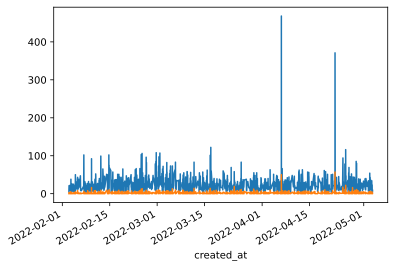

In [43]:
df_twitter.favorite_count.plot()
df_twitter.rt_count.plot()

In [47]:
df_twitter.query('favorite_count == favorite_count.max()')

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-06 16:15:57,1511784797378682892,2022-05-03 14:37:18,Touro futurista em referência ao Bitcoin é ina...,59773459,infomoney,50,468


In [48]:
df_twitter.query('rt_count == rt_count.max()')

,tweet_id,search_dt,text,user_id,screen_name,rt_count,favorite_count
created_at,,,,,,,
2022-04-22 12:36:00,1517527648464949248,2022-05-03 14:37:15,Quanto de Imposto de Renda o vencedor do BBB p...,59773459,infomoney,57,371


---